In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [7]:
# Drop duplicate records
df.drop_duplicates(inplace=True)

# Drop house_rules and license columns if they exist
df.drop(['house_rules', 'license'], axis=1, inplace=True, errors='ignore')

# Remove all dollar signs in the price and service fee columns, if columns exist
for col in ['price', 'service_fee']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('$', '', regex=False)

# Remove all commas in the price and service fee columns, if columns exist
for col in ['price', 'service_fee']:
    if col in df.columns:
        df[col] = df[col].str.replace(',', '', regex=False)

# Rename the price and service fee columns to include a dollar sign, if columns exist
rename_dict = {}
if 'price' in df.columns:
    rename_dict['price'] = 'price_$'
if 'service_fee' in df.columns:
    rename_dict['service_fee'] = 'service_fee_$'
df.rename(columns=rename_dict, inplace=True)

# Drop all records with missing values
df.dropna(inplace=True)

# Change all mismatched data types to the appropriate ones, if columns exist
if 'price_$' in df.columns:
    df['price_$'] = df['price_$'].astype(float)
if 'service_fee_$' in df.columns:
    df['service_fee_$'] = df['service_fee_$'].astype(float)
if 'id' in df.columns:
    df['id'] = df['id'].astype(str)
if 'host_id' in df.columns:
    df['host_id'] = df['host_id'].astype(str)
if 'last review' in df.columns:
    df['last review'] = pd.to_datetime(df['last review'])
if 'construction year' in df.columns:
    df['construction year'] = df['construction year'].astype(int)

# Correct the spelling of 'brookln' to 'Brooklyn' in 'neighbourhood group' column
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Get rid of outliers in the 'availability 365' column data
if 'availability 365' in df.columns:
    df = df.drop(df[df['availability 365'] > 500].index)



In [8]:
df.duplicated().value_counts()

,count
False,83567


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83567 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83567 non-null  object        
 1   NAME                            83567 non-null  object        
 2   host id                         83567 non-null  int64         
 3   host_identity_verified          83567 non-null  object        
 4   host name                       83567 non-null  object        
 5   neighbourhood group             83567 non-null  object        
 6   neighbourhood                   83567 non-null  object        
 7   lat                             83567 non-null  float64       
 8   long                            83567 non-null  float64       
 9   country                         83567 non-null  object        
 10  country code                    83567 non-null  object        
 11  instan

In [10]:
df.describe()

,host id,lat,long,instant_bookable,Construction year,price_$,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,8.356700e+04,83567.000000,83567.000000,83567.000000,83567.000000,83389.000000,83567.000000,83567.000000,83567.000000,83567,83567.000000,83567.000000,83567.000000,83567.000000
mean,4.919102e+10,40.727354,-73.948502,0.497732,2012.488530,626.209668,125.232436,7.418981,32.248184,2019-06-09 04:55:24.163844352,1.376337,3.278627,7.047531,141.747652
min,1.236005e+08,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,2.445236e+10,40.687655,-73.982120,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,4.903800e+10,40.721330,-73.953720,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,7.385685e+10,40.762580,-73.930800,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,2.853419e+10,0.056315,0.050343,0.499998,5.761109,331.803443,66.357813,28.114949,51.936949,NaN,1.750221,1.283771,29.583715,133.385913


In [11]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44259
Private room,37549
Shared room,1651
Hotel room,108


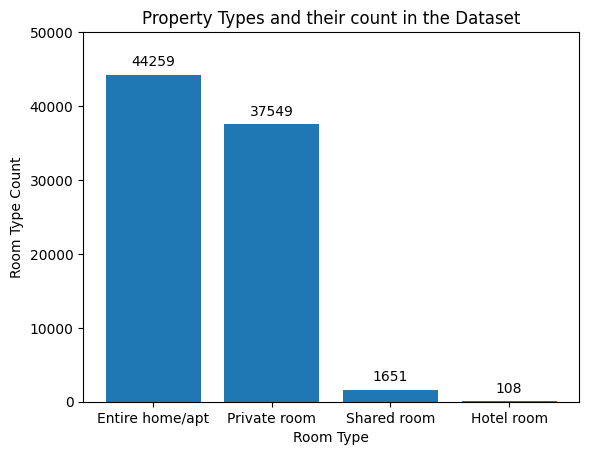

In [12]:
# What are the different property types in the Dataset?
property_types = df['room type'].value_counts().to_frame()
property_types

# Room type count plotted on a bar chart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"])
plt.bar_label(room_type_bar, labels=property_types.loc[:, "count"], padding=4)
plt.ylim(0, 50000)
plt.xlabel('Room Type')
plt.ylabel('Room Type Count')
plt.title('Property Types and their count in the Dataset')
plt.show()

In [13]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34684
Manhattan,34641
Queens,11152
Bronx,2272
Staten Island,818


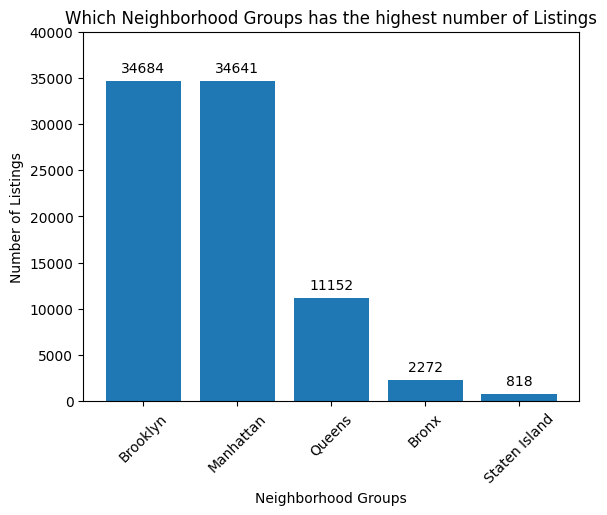

In [14]:
# Which neighborhood group has the highest number of listings?
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"])
plt.bar_label(hood_group_bar, labels=hood_group.loc[:, "count"], padding=4)
plt.ylim(0, 40000)
plt.xlabel('Neighborhood Groups')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.title('Which Neighborhood Groups has the highest number of Listings')
plt.show()

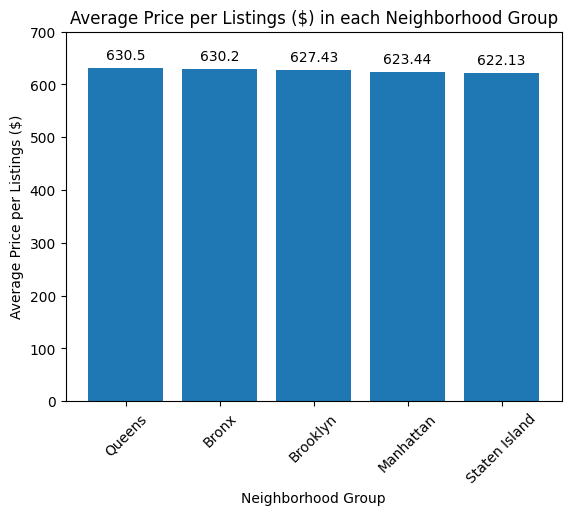

In [15]:
# Which neighborhoods group have the highest average prices for Airbnb listings?
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, 'price_$'])
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, 'price_$'], 2), label_type='edge', padding=4)
plt.ylim(0, 700)
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price per Listings ($)')
plt.xticks(rotation=45)
plt.title('Average Price per Listings ($) in each Neighborhood Group')
plt.show()


Text(0.5, 1.0, 'Average Price ($) for Properties in each Construction Year')

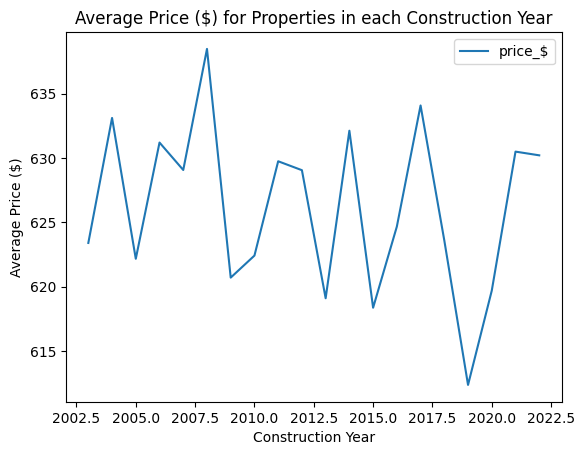

In [16]:
#15: Is there a relationship between the construction year of property and price?
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) for Properties in each Construction Year')


Text(0.5, 1.0, 'Top 10 Hosts by Calculated host Listings Count')

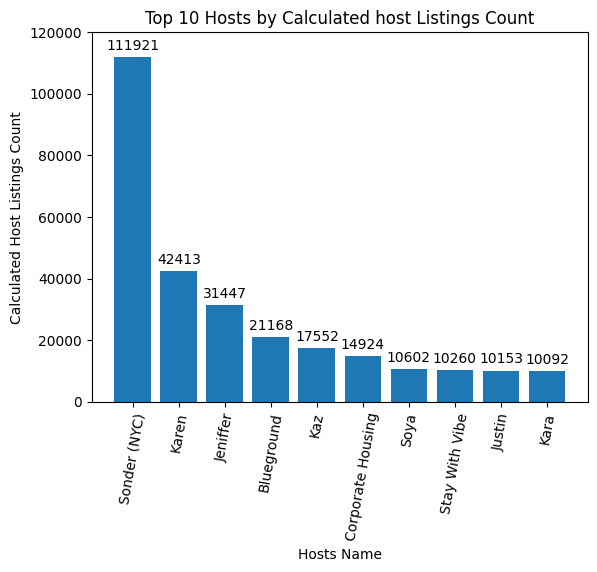

In [17]:
#who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count'])
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3)
plt.xlabel('Hosts Name')
plt.ylabel('Calculated Host Listings Count')
plt.xticks(rotation = 80);
plt.ylim(0, 120000)
plt.title('Top 10 Hosts by Calculated host Listings Count')

In [18]:
#Are hosts with verified identities more likely to receive positive reviews?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283782
unconfirmed,3.273473


Text(0.5, 1.0, 'Average Review Rate for each Verification statistics.')

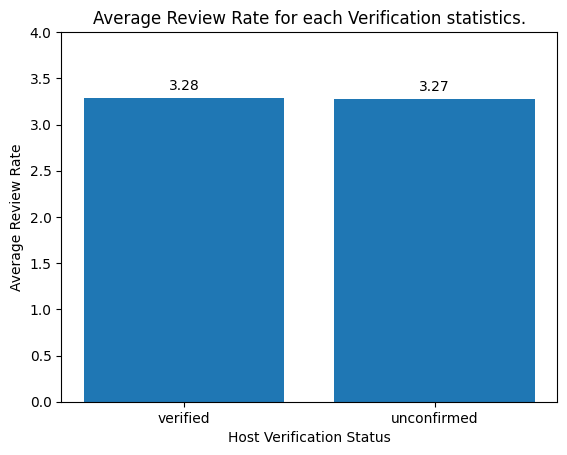

In [19]:
review_bar = plt.bar(review.index, review.loc[:, 'review rate number'])
plt.bar_label(review_bar, labels = round(review.loc[:, 'review rate number'], 2), padding = 4)
plt.ylim([0, 4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate')
plt.title('Average Review Rate for each Verification statistics.')

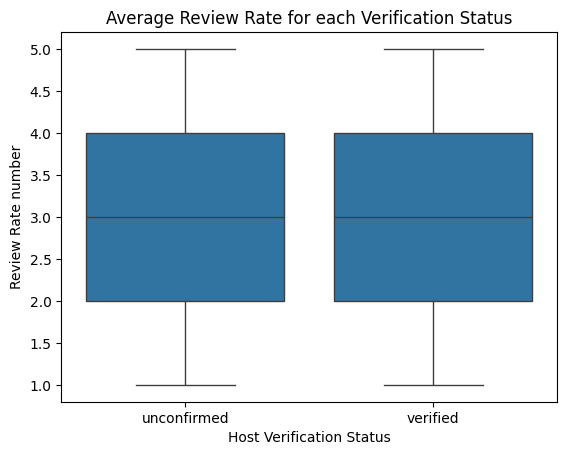

In [20]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate number');
plt.title('Average Review Rate for each Verification Status');

In [21]:
# Check the correlation between price and service fee
correlation = df['price_$'].corr(df['service fee'])
print(correlation)

0.9999909082976475


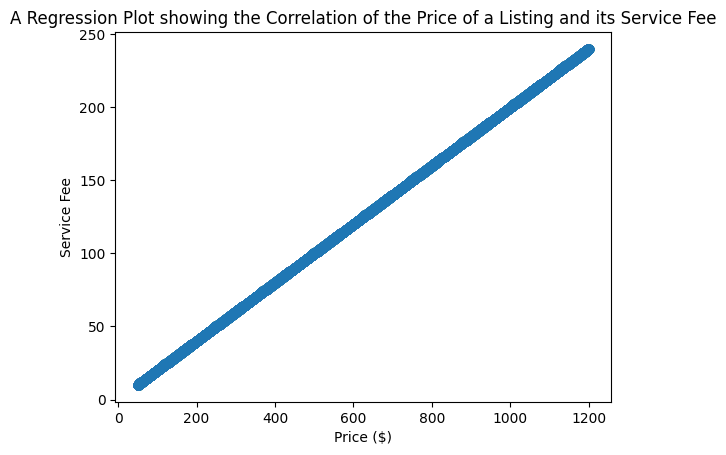

In [22]:
# Plot regression between price and service fee
sns.regplot(data=df, x='price_$', y='service fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee')
plt.title('A Regression Plot showing the Correlation of the Price of a Listing and its Service Fee')
plt.show()

In [23]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
AIRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
AIRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.308924
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242757
                    Hotel room                 3.833333
                    Private room               3.274284
                    Shared room                3.325083
Manhattan           Entire home/apt            3.268773
                    Hotel room                 3.500000
                    Private room               3.285877
                    Shared room                3.256716
Queens              Entire home/apt            3.347992
                    Hotel room                 3.750000
                    Private room               3.310958
                    Shared room                3.327402
Staten Island       Entire home/apt            3.330144
                    Private room               3.498728
                    Shared room                3.714286

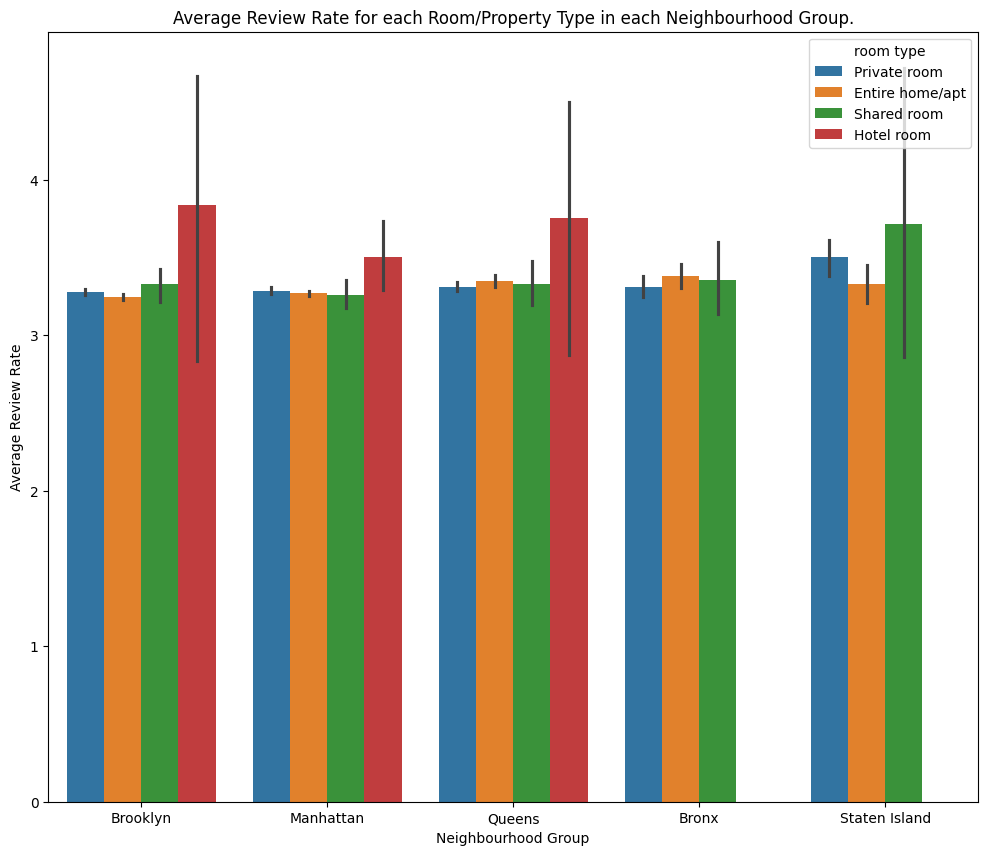

In [24]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

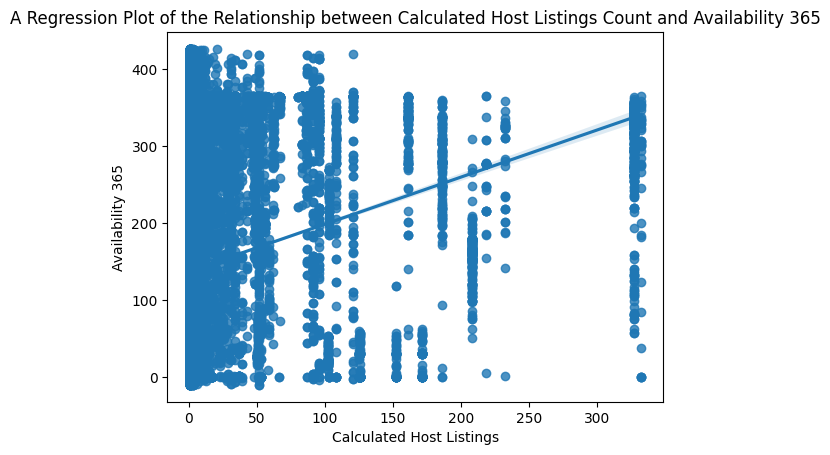

In [25]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');

In [26]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.135616101741481)